# Análise Exploratória

<div style="text-align:justify">
Este notebook realiza uma análise exploratória sobre os dados de Cadastro de Empresas Inidôneas e Suspensas (CEIS), disponíveis no Portal da Transparência e Controladoria Geral da União (CGU), acessíveis através do [Link](http://www.portaltransparencia.gov.br/downloads/snapshot.asp?c=CEIS#get).
</div>

### Carregando Pacotes

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import unicodedata
import re

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Carregando Dados

<div style="text-align:justify">
Os dados carregados apresentam: <br><br>
Tipo de Pessoa; CPF ou CNPJ do Sancionado; Nome Informado pelo Órgão Sancionador; Razão Social - Cadastro Receita; Nome Fantasia - Cadastro Receita; Número do processo; Tipo Sanção; Data Início Sanção; Data Final Sanção; Órgão Sancionador; UF Órgão Sancionador; Origem Informações; Data Origem Informações; Data Publicação; Publicação; Detalhamento; Abrangência definida em decisão judicial; Fundamentação Legal; Descrição da Fundamentação Legal; Data do Trânsito em Julgado; Complemento do Órgão; e Contato da Origem da Informação.
</div>

In [3]:
dataset = pd.read_csv("../datasets/20180331_CEIS.csv", sep=';', encoding='latin1')
dataset.count()

Tipo de Pessoa                              12537
CPF ou CNPJ do Sancionado                   12537
Nome Informado pelo Órgão Sancionador       12537
Razão Social - Cadastro Receita             12531
Nome Fantasia - Cadastro Receita             4528
Número do processo                          12537
Tipo Sanção                                 12537
Data Início Sanção                          12537
Data Final Sanção                           11384
Órgão Sancionador                           12536
UF Órgão Sancionador                        11547
Origem Informações                          12537
Data Origem Informações                     12537
Data Publicação                              6166
Publicação                                   5076
Detalhamento                                 2181
Abrangência definida em decisão judicial     1243
Fundamentação Legal                         12147
Descrição da Fundamentação Legal            12147
Data do Trânsito em Julgado                  5384


### Hipóteses de Análise:

- H1: Existe alguma predominância pelo tipo de pessoa
- H2: Existe alguma predominância pelo tipo de sanção
- H3: Algum orgão sancionador é mais predominante
- H4: Proporção de sanções por fundamentação legal

### H1: Predominância por Tipo de Pessoa

<div style="text-align:justify">
Podemos notar que não há predominância no número de sanções de acordo com o tipo de pessoa, muito embora a maior parte das sanções estejam associadas a Pessoas Jurídicas.
</div>

In [4]:
dataset[u"Tipo de Pessoa"].value_counts()

Juridica    6772
Fisica      5765
Name: Tipo de Pessoa, dtype: int64

### H2: Predominância pelo Tipo de Sanção

<div style="text-align:justify">
Podemos notar que existe predominância por tipo de sanção, onde o maior número de ocorrências é por _Proibição - Lei de Improbidade_, com 5982 sanções; seguido de 2160 _Impedimento - Lei do Pregão_ com e 2051 _Suspensão - Lei de Licitações_.
</div>

In [5]:
tp_sancao = dataset[u"Tipo Sanção"].value_counts().head(10)
tp_sancao

Proibição - Lei de Improbidade                              5982
Impedimento - Lei do Pregão                                 2160
Suspensão - Lei de Licitações                               2051
Inidoneidade - Lei de Licitações                             685
Inidoneidade - Legislação Estadual                           408
Decisão judicial liminar/cautelar que impeça contratação     242
Proibição - Lei Eleitoral                                    241
Inidoneidade - Lei da ANTT e ANTAQ                           196
Suspensão - Legislação Estadual                              195
Inidoneidade - Lei Orgânica TCU                              193
Name: Tipo Sanção, dtype: int64

#### Representação Gráfica - Tipo de Sanção

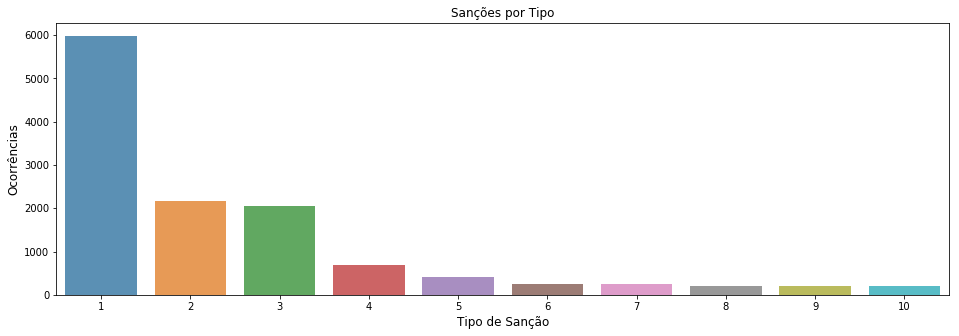

In [6]:
plt.figure(figsize=(16, 5))
sns.barplot(range(1, tp_sancao.count() + 1), tp_sancao.values, alpha=0.8)
plt.title(u"Sanções por Tipo")
plt.ylabel(u"Ocorrências", fontsize=12)
plt.xlabel(u"Tipo de Sanção", fontsize=12)
plt.show()

#### Tipo de Sanção Pessoa Jurídica

<div style="text-align:justify">
Vamos agora fazer uma análise mais detalhada, avaliando a predominância de tipo de sanções por pessoa jurídica. Podemos notar que o maior número de ocorrências é o _Impedimento - Lei do Pregão_, com 2125 sanções; seguido de 1953 _Suspensão - Lei de Licitações_ e 663 _Inidoneidade - Lei de Licitações_.
</div>

In [7]:
tp_sancao_pj = dataset.loc[dataset[u"Tipo de Pessoa"] == "Juridica"][u"Tipo Sanção"].value_counts().head(10)
tp_sancao_pj

Impedimento - Lei do Pregão                                 2125
Suspensão - Lei de Licitações                               1953
Inidoneidade - Lei de Licitações                             663
Proibição - Lei de Improbidade                               562
Inidoneidade - Legislação Estadual                           393
Proibição - Lei Eleitoral                                    240
Inidoneidade - Lei da ANTT e ANTAQ                           196
Inidoneidade - Lei Orgânica TCU                              189
Suspensão - Legislação Estadual                              176
Decisão judicial liminar/cautelar que impeça contratação     106
Name: Tipo Sanção, dtype: int64

#### Tipo de Sanção Pessoa Física

<div style="text-align:justify">
Vamos agora fazer uma análise mais detalhada, avaliando a predominância de tipo de sanções por pessoa física. Podemos notar que é predominante o número de sanções do tipo _Proibição - Lei de Improbidade_, com 5420 ocorrências. Os demais tipo de sanções ocorrerm em número bem baixo, se comparado com este citado anteriormente.
</div>

In [8]:
dataset.loc[dataset[u"Tipo de Pessoa"] == "Fisica"][u"Tipo Sanção"].value_counts().head(10)

Proibição - Lei de Improbidade                              5420
Decisão judicial liminar/cautelar que impeça contratação     136
Suspensão - Lei de Licitações                                 98
Impedimento - Lei do Pregão                                   35
Inidoneidade - Lei de Licitações                              22
Suspensão - Legislação Estadual                               19
Inidoneidade - Legislação Estadual                            15
Proibição - Lei Antitruste                                     7
Impedimento - Legislação Estadual                              5
Inidoneidade - Lei Orgânica TCU                                4
Name: Tipo Sanção, dtype: int64

### H3: Predominância por Órgão Sancionador

<div style="text-align:justify">
A maior parte das sanções são realizadas pela Justiça Estadual, com 556 ocorrências; seguida da Justiça Federal com  366 e Procuradoria Geral do Estado, com 336 sanções.
</div>

In [9]:
orgao = dataset[u"Órgão Sancionador"].value_counts().head(10)
orgao

Justiça Estadual                               556
Justiça Federal                                366
PROCURADORIA GERAL DO ESTADO                   336
Governo do Estado da Bahia                     305
AGÊNCIA NACIONAL DE TRANSPORTES TERRESTRES     212
EMPRESA BRASILEIRA DE CORREIOS E TELÉGRAFOS    194
CAIXA ECONÔMICA FEDERAL                        181
Governo do Estado da Bahia (BA)                161
Receita Federal do Brasil                      131
TRIBUNAL DE CONTAS DA UNIÃO                    125
Name: Órgão Sancionador, dtype: int64

#### Representação Gráfica - Órgão Sancionador

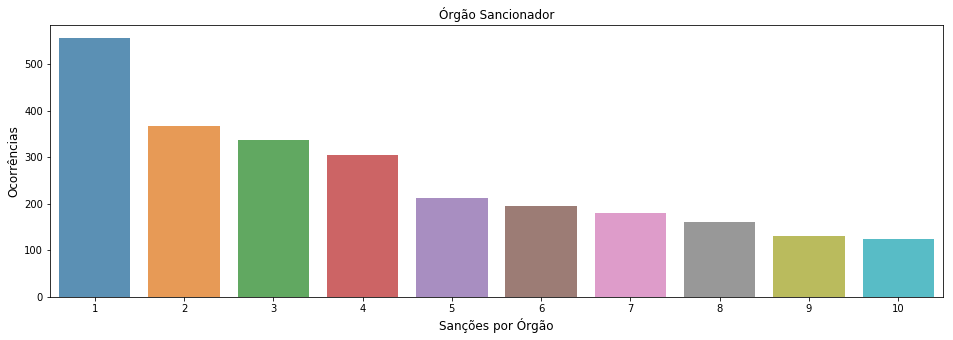

In [10]:
plt.figure(figsize=(16, 5))
sns.barplot(range(1, orgao.count() + 1), orgao.values, alpha=0.8)
plt.title(u"Órgão Sancionador")
plt.ylabel(u"Ocorrências", fontsize=12)
plt.xlabel(u"Sanções por Órgão", fontsize=12)
plt.show()

### H4: Sanções por Fundamentação Legal

<div style="text-align:justify">
A maior parte das sanções são fundamentadas por Art. 12, Lei 8429/1992, com 5994 ocorrências; seguido de 2160 sanções fundamentadas por Art. 7, Lei 10520/2002 e 2070 sanções fundamentadas por Art. 87, inciso III, Lei 8666/1993.
</div>

In [11]:
dataset[u"Fundamentação Legal"].value_counts().head(10)

Art. 12, Lei 8429/1992                   5994
Art. 7, Lei 10520/2002                   2160
Art. 87, inciso III, Lei 8666/1993       2070
Art. 87, inciso IV, Lei 8666/1993         733
Art. 81, § 3, Lei 9504/1997               241
Art. 78, Lei 10233/2001                   195
Art. 46, Lei 8443/1992                    193
Art. 186, inciso III, Lei 9433/2005       192
Art. 186, inciso II, Lei 9433/2005         98
Art. 45, inciso I, Decreto 45902/2012      58
Name: Fundamentação Legal, dtype: int64

#### Fundamentação Legal - Pessoa Jurídica

<div style="text-align:justify">
Ao analisar as fundamentações legais por pessoa jurídica, é possível notar que há predominância no Art. 7, Lei 10520/2002 e Art. 87, inciso III, Lei 8666/1993, com 2125 e 1972, respectivamente.
</div>

In [12]:
dataset.loc[dataset[u"Tipo de Pessoa"] == "Juridica"][u"Fundamentação Legal"].value_counts(normalize=True).head(10)

Art. 7, Lei 10520/2002                   0.325820
Art. 87, inciso III, Lei 8666/1993       0.302361
Art. 87, inciso IV, Lei 8666/1993        0.108249
Art. 12, Lei 8429/1992                   0.086783
Art. 81, § 3, Lei 9504/1997              0.036799
Art. 78, Lei 10233/2001                  0.029899
Art. 186, inciso III, Lei 9433/2005      0.029439
Art. 46, Lei 8443/1992                   0.028979
Art. 186, inciso II, Lei 9433/2005       0.015026
Art. 45, inciso I, Decreto 45902/2012    0.008433
Name: Fundamentação Legal, dtype: float64

#### Fundamentação Legal - Pessoa Física

<div style="text-align:justify">
Ao analisar as fundamentações legais por pessoa física, é possível notar grande predominância no Art. 12, Lei 8429/1992, que por sinal possui o maior número de ocorrências entre todas as fundamentações legais.
</div>

In [13]:
dataset.loc[dataset[u"Tipo de Pessoa"] == "Fisica"][u"Fundamentação Legal"].value_counts(normalize=True).head(10)

Art. 12, Lei 8429/1992                    0.964978
Art. 87, inciso III, Lei 8666/1993        0.017422
Art. 7, Lei 10520/2002                    0.006222
Art. 87, inciso IV, Lei 8666/1993         0.004800
Art. 38, inciso II, Lei 12529/2011        0.001244
Art. 319, inciso VI, Decreto 3689/1941    0.001067
Art. 2, inciso I, Lei 11389/1999          0.000889
Art. 46, Lei 8443/1992                    0.000711
Art. 150, inciso III, Lei 15608/2007      0.000533
Art. 150, inciso IV, Lei 15608/2007       0.000533
Name: Fundamentação Legal, dtype: float64

### Conclusões

- As sanções estão bem distribuídas entre os tipos de pessoas, não existe predominância.
- As sanções de Pessoas Jurídicas se concentram em irregularidaes em licitações.
- As sanções de Pessoa Física se concentram em proibição pela lei de improbidade (enriquecimento ilícito).
- A maior parte das sanções são realizadas pela Justiça do Estado, mas não existe grande predominância pelo órgão sancionador.